Bike sales dataset - What pattern/trend can I find in the customers who purchase/did not purchase bikes? Can I predict if a customer will purchase a bike?
1. Find the relationship between feature columns and the target column
2. Which feature column affects the target column greatly?
3. Plot these feature columns against target column to find hidden relationship
4. Build model to predict if a customer will purchase a bike
5. Build different models to compare
6. Optimize models to get best accuracy

Feature columns impact on target column based on self judgement:
- Martial Status - Low
- Gender - Low
- Income - High
- Children - High
- Education - Low
- Occupation - High
- Home Owner - Low
- Cars - High
- Commute Distance - High
- Region - High
- Age - High
- Age Brackets - High

## Import dependencies

In [1]:
# Import relavent dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [39]:
# Read data
bike_sales_df = pd.read_excel('Bike Sales Dashboard.xlsx',sheet_name='bike_buyers')

# Show first 10 rows of dataframe
bike_sales_df.head(10)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,Middle Age,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Middle Age,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Middle Age,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,Old,No
9,19280,Married,Male,120000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Middle Age,Yes


## EDA

In [3]:
# Display basic statistics of dataset
bike_sales_df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


### Overall Distribution of different features

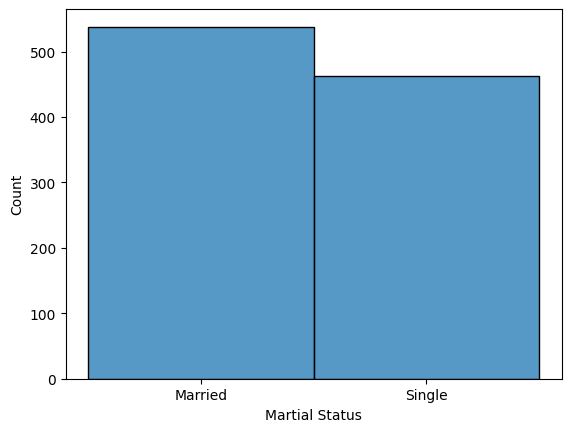

In [4]:
# Plotting histogram for "Martial Status"
sns.histplot(data=bike_sales_df,x='Martial Status')
plt.show()

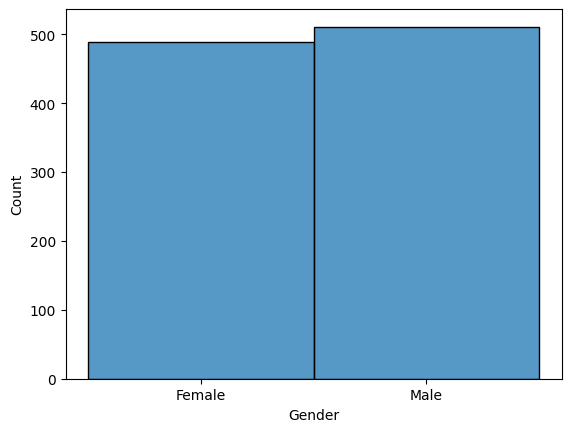

In [5]:
# Plotting histogram for "Gender"
sns.histplot(data=bike_sales_df,x='Gender')
plt.show()

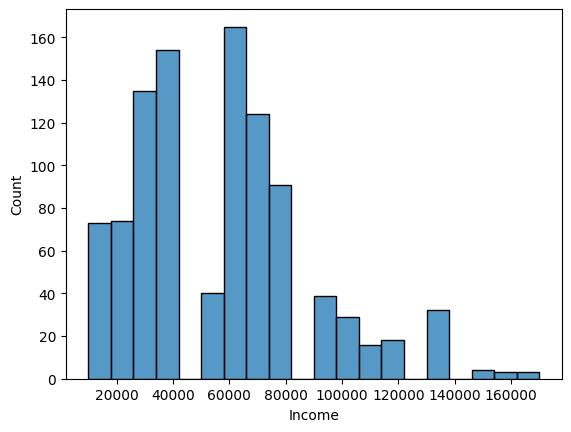

In [6]:
# Plotting histogram for "Income"
sns.histplot(data=bike_sales_df,x='Income')
plt.show()

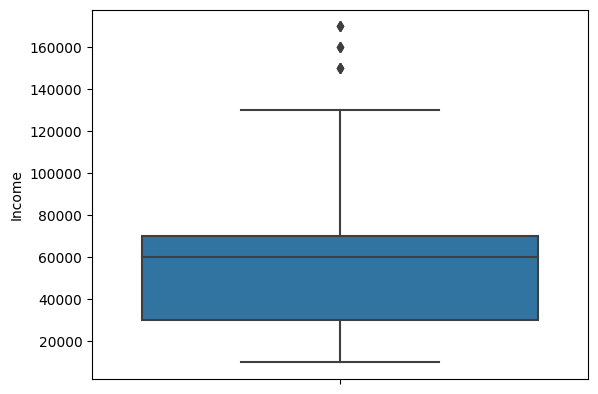

In [7]:
# Plotting boxplot for "Income"
sns.boxplot(data=bike_sales_df,y='Income')
plt.show()

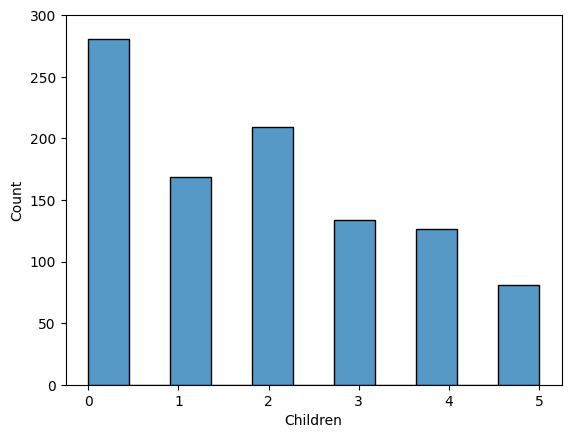

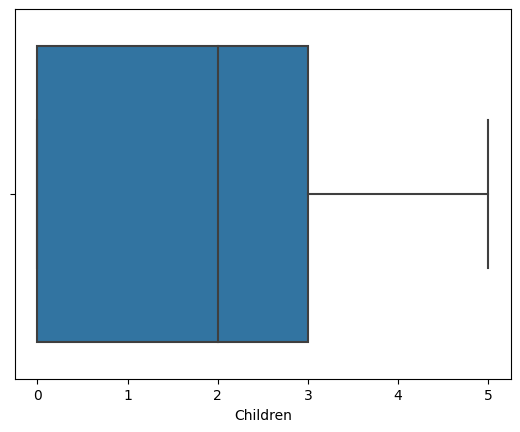

In [8]:
# Plotting histogram for "Children"
sns.histplot(data=bike_sales_df,x='Children')
plt.yticks(np.arange(0,350,50))
plt.show()

# Plotting boxplot for "Children"
sns.boxplot(data=bike_sales_df,x='Children')
plt.show()

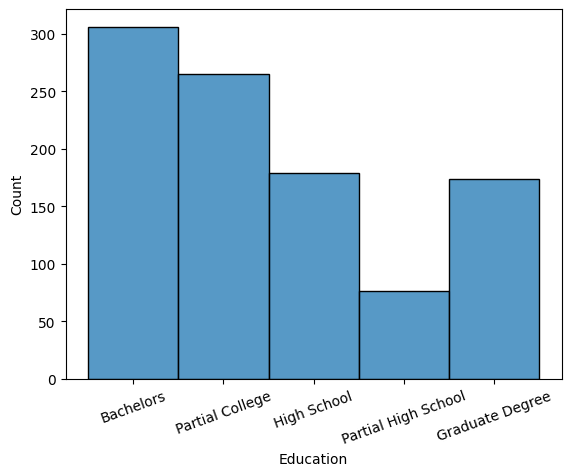

In [9]:
# Plotting histogram for "Education"
sns.histplot(data=bike_sales_df,x='Education')
plt.xticks(rotation=20)
plt.show()

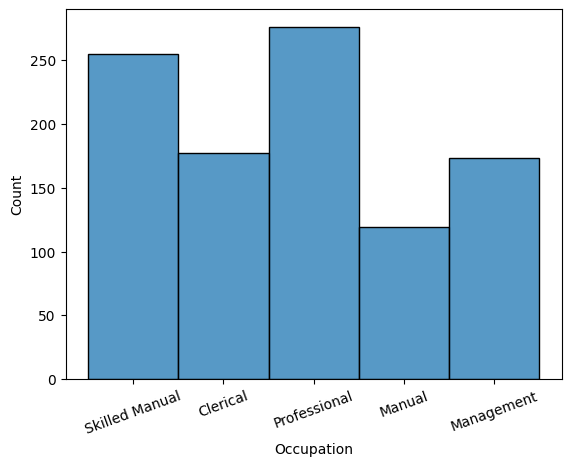

In [10]:
# Plotting histogram for "Occupation"
sns.histplot(data=bike_sales_df,x='Occupation')
plt.xticks(rotation=20)
plt.show()

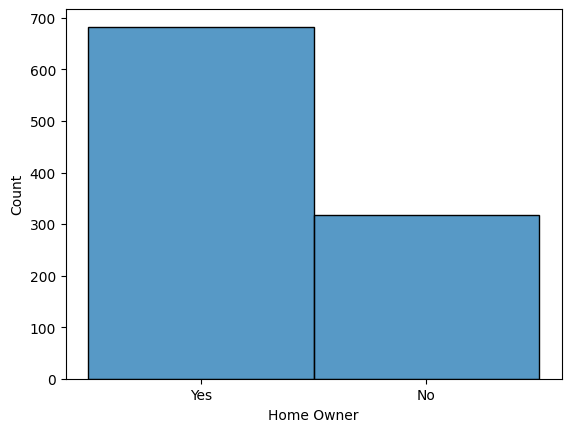

In [11]:
# Plotting histogram for "Home owner"
sns.histplot(data=bike_sales_df,x='Home Owner')
plt.show()

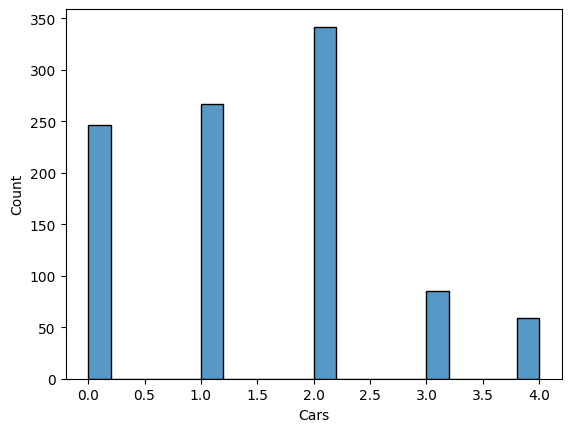

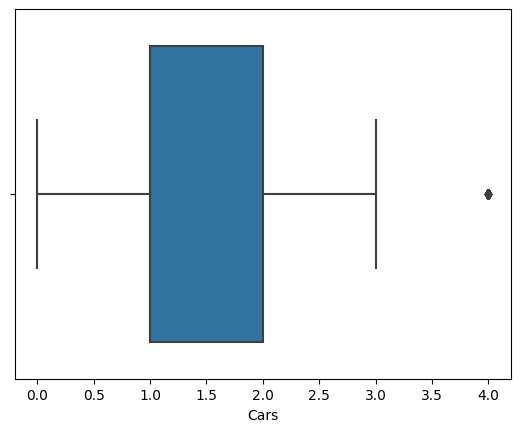

In [12]:
# Plotting histogram for "Cars"
sns.histplot(data=bike_sales_df,x='Cars')
plt.show()

# Plotting boxplot for "Cars"
sns.boxplot(data=bike_sales_df,x='Cars')
plt.show()

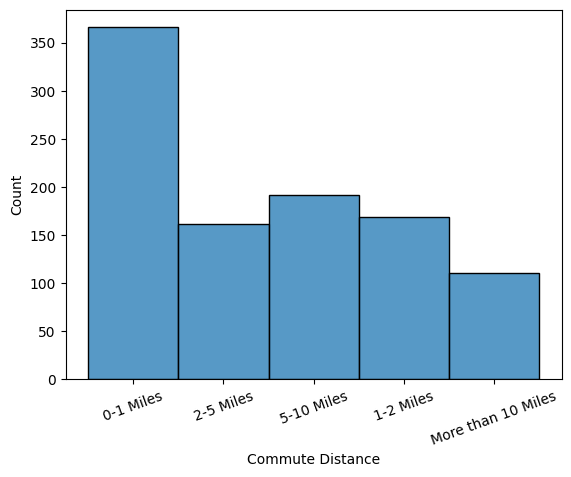

In [13]:
# Plotting histogram for "Commute Distance"
sns.histplot(data=bike_sales_df,x='Commute Distance')
plt.xticks(rotation=20)
plt.show()

In [14]:
print('Percentage of 0-1 Miles commuters:',len(bike_sales_df[bike_sales_df['Commute Distance']=='0-1 Miles'])*100/len(bike_sales_df))

Percentage of 0-1 Miles commuters: 36.6


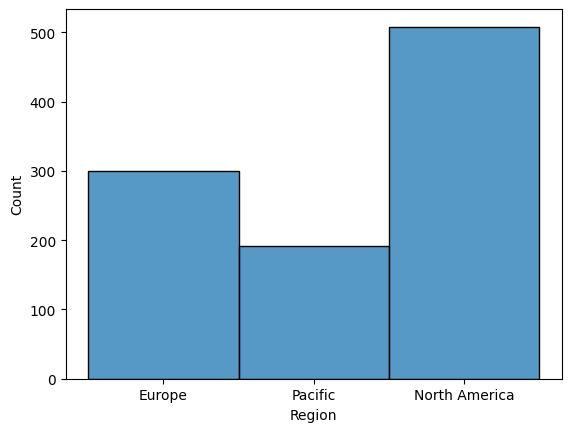

In [15]:
# Plotting histogram for "Region"
sns.histplot(data=bike_sales_df,x='Region')
plt.show()

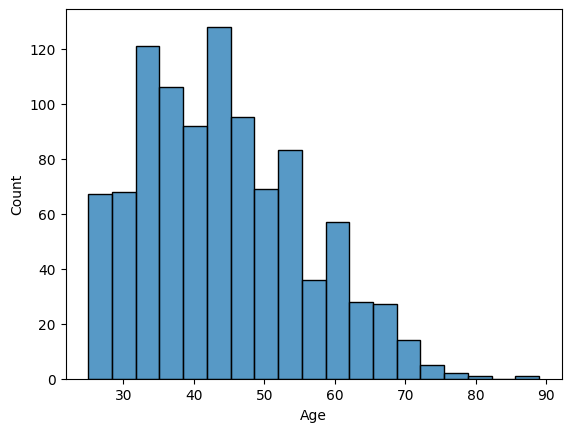

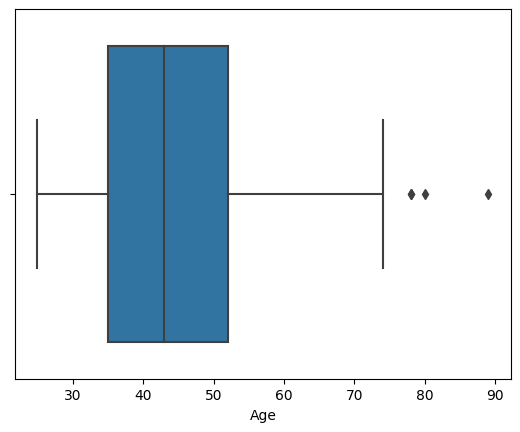

count    1000.000000
mean       44.163000
std        11.364488
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

In [16]:
# Plotting histogram for "Age"
sns.histplot(data=bike_sales_df,x='Age')
plt.show()

# Plotting boxplot for "Age"
sns.boxplot(data=bike_sales_df,x='Age')
plt.show()

bike_sales_df['Age'].describe()

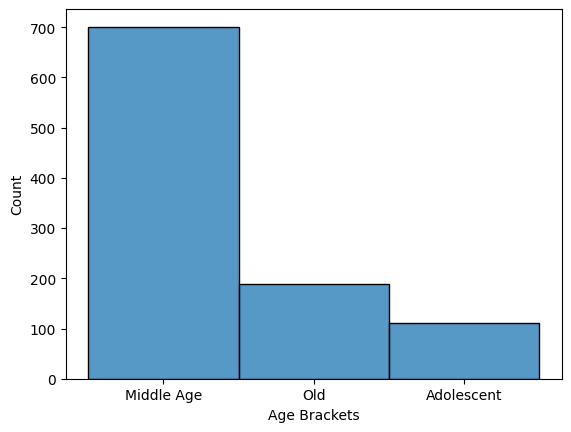

In [17]:
# Plotting histogram for "Age Brackets"
sns.histplot(data=bike_sales_df,x='Age Brackets')
plt.show()

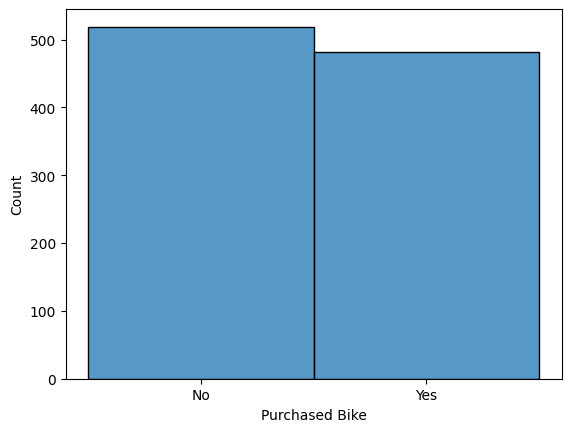

In [18]:
# Plotting histogram for "Purchased Bike"
sns.histplot(data=bike_sales_df,x='Purchased Bike')
plt.show()

#### Summary of basic data exploration
1) The Martial status ratio between Married and Single is about even
2) The Gender ratio between Male and Female is about even
3) 50% of the population in this dataset falls under the income range of 30k ~ 70k with the median being 60k
    - Outliers were left in to see how the models would perform, future work could include testing without outliers
4) 50% of the population in this dataset has 0 ~ 3 children with the median being 2 children
5) Majority of the population in this dataset did higher education after high school
6) Professional, Skilled manual and management are occupations with the highest counts in this dataset
7) The amount of homeowners double that of non-homeowners
8) 50% of the population in this dataset has 1 ~ 2 cars
9) 36.6% of the population in this dataset commute 0-1 miles, while the rest of the population are split evenly between 1-2 miles, 2-5 miles, 5-10 miles and more than 10 miles being the least.
10) 50% of the population in this dataset are from North America, followed by Europe at 30%, then Pacific Region at 20%
11) 50% of the population in this dataset falls under the age range of 35 ~ 52 with the median being 43
12) 70% of the population in this dataset are middle aged, 20% are old aged, and 10% are adolescent
13) The Purchased bike ratio between Yes and No is about even

### Further visualization with target features

In [40]:
bike_sales_df.head(5)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


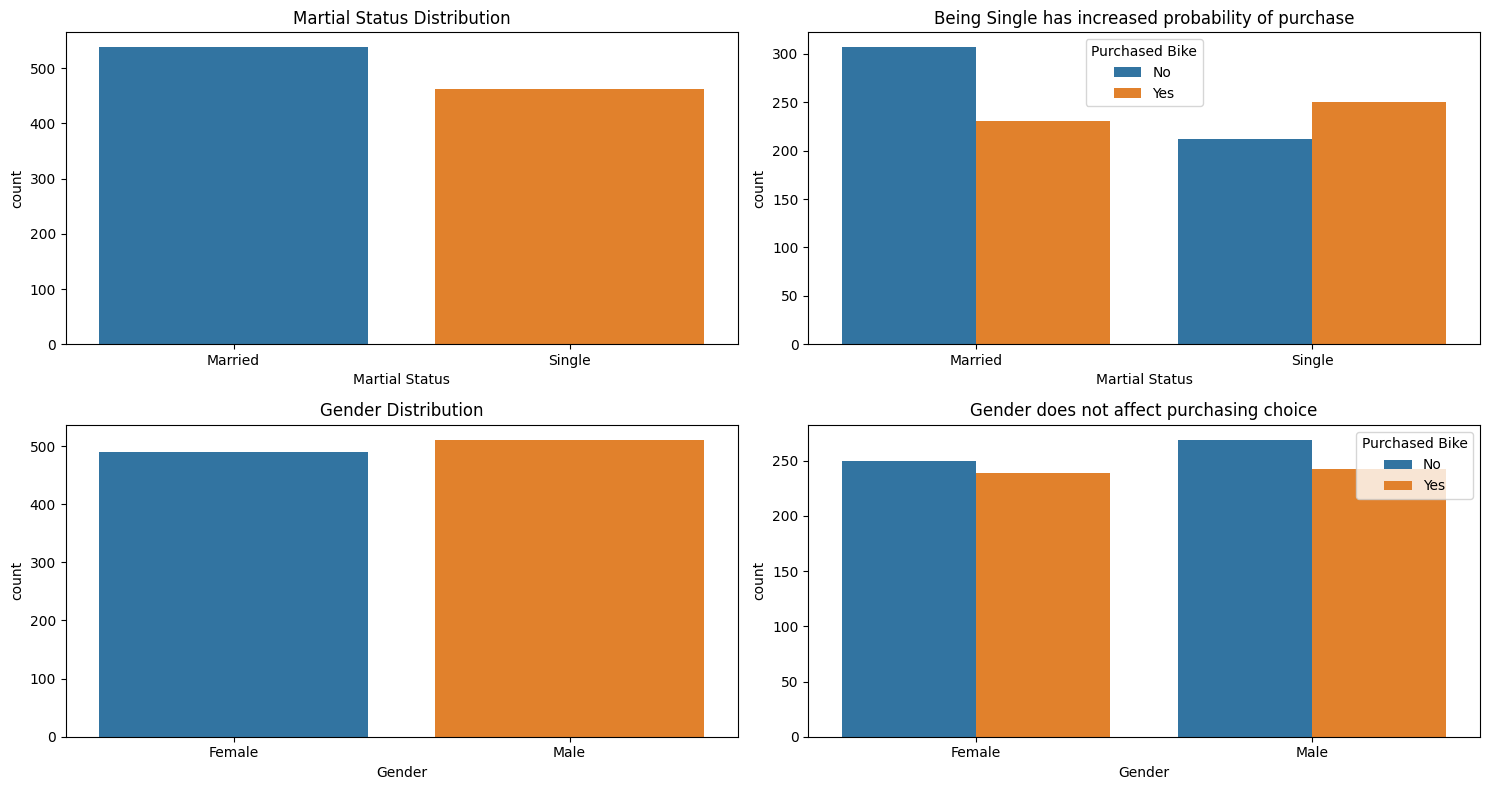

In [44]:
fig, axs = plt.subplots(2,2,figsize=(15,8))

sns.countplot(data=bike_sales_df,x='Martial Status',ax=axs[0,0])
axs[0,0].set_title('Martial Status Distribution')
sns.countplot(data=bike_sales_df,x='Martial Status',ax=axs[0,1],hue='Purchased Bike')
axs[0,1].set_title('Being Single has increased probability of purchase')

sns.countplot(data=bike_sales_df,x='Gender',ax=axs[1,0])
axs[1,0].set_title('Gender Distribution')
sns.countplot(data=bike_sales_df,x='Gender',ax=axs[1,1],hue='Purchased Bike')
axs[1,1].set_title('Gender does not affect purchasing choice')

plt.tight_layout()
plt.show()

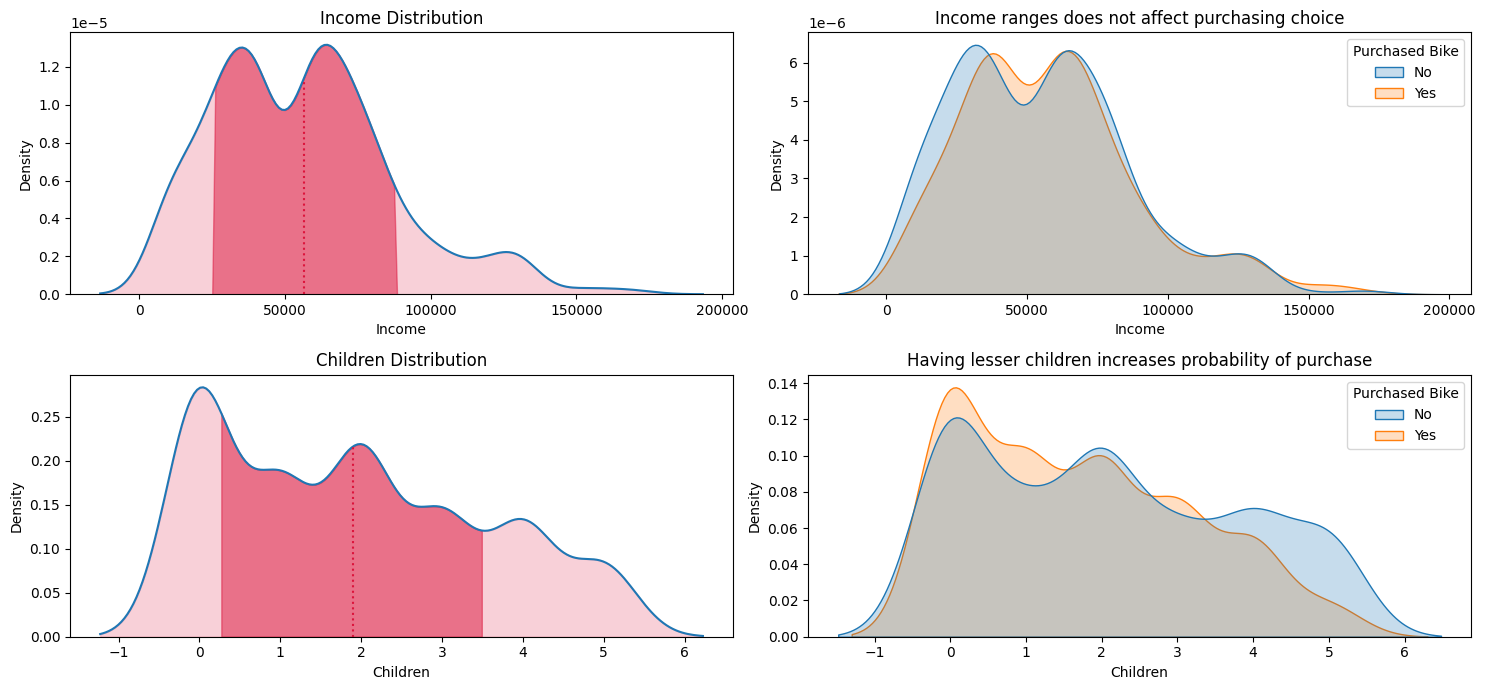

In [41]:
fig, axs = plt.subplots(2,2,figsize=(15,7))

sns.kdeplot(data=bike_sales_df,x='Income',fill=False,ax=axs[0,0])
kdeline = axs[0,0].lines[0]
mean = bike_sales_df['Income'].mean()
std = bike_sales_df['Income'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height_m = np.interp(mean,xs,ys)
axs[0,0].vlines(mean,0,height_m,color='crimson',ls=':')
axs[0,0].fill_between(xs,0,ys,where=(mean-std<=xs)&(xs<=mean+std),interpolate=True,color='crimson',alpha=0.5)
axs[0,0].fill_between(xs,0,ys,color='crimson',alpha=0.2)
axs[0,0].set_title('Income Distribution')

sns.kdeplot(data=bike_sales_df,x='Income',hue='Purchased Bike',fill=True,ax=axs[0,1])
axs[0,1].set_title('Income ranges does not affect purchasing choice')

sns.kdeplot(data=bike_sales_df,x='Children',ax=axs[1,0])
mean = bike_sales_df['Children'].mean()
std = bike_sales_df['Children'].std()
kdeline = axs[1,0].lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height_m = np.interp(mean,xs,ys)
axs[1,0].vlines(mean,0,height_m,color='crimson',ls=':')
axs[1,0].fill_between(xs,0,ys,where=(mean-std<=xs)&(xs<=mean+std),color='crimson',alpha=0.5)
axs[1,0].fill_between(xs,0,ys,color='crimson',alpha=0.2)
axs[1,0].set_title('Children Distribution')

sns.kdeplot(data=bike_sales_df,x='Children',hue='Purchased Bike',fill=True,ax=axs[1,1])
axs[1,1].set_title('Having lesser children increases probability of purchase')

plt.tight_layout()
plt.show()

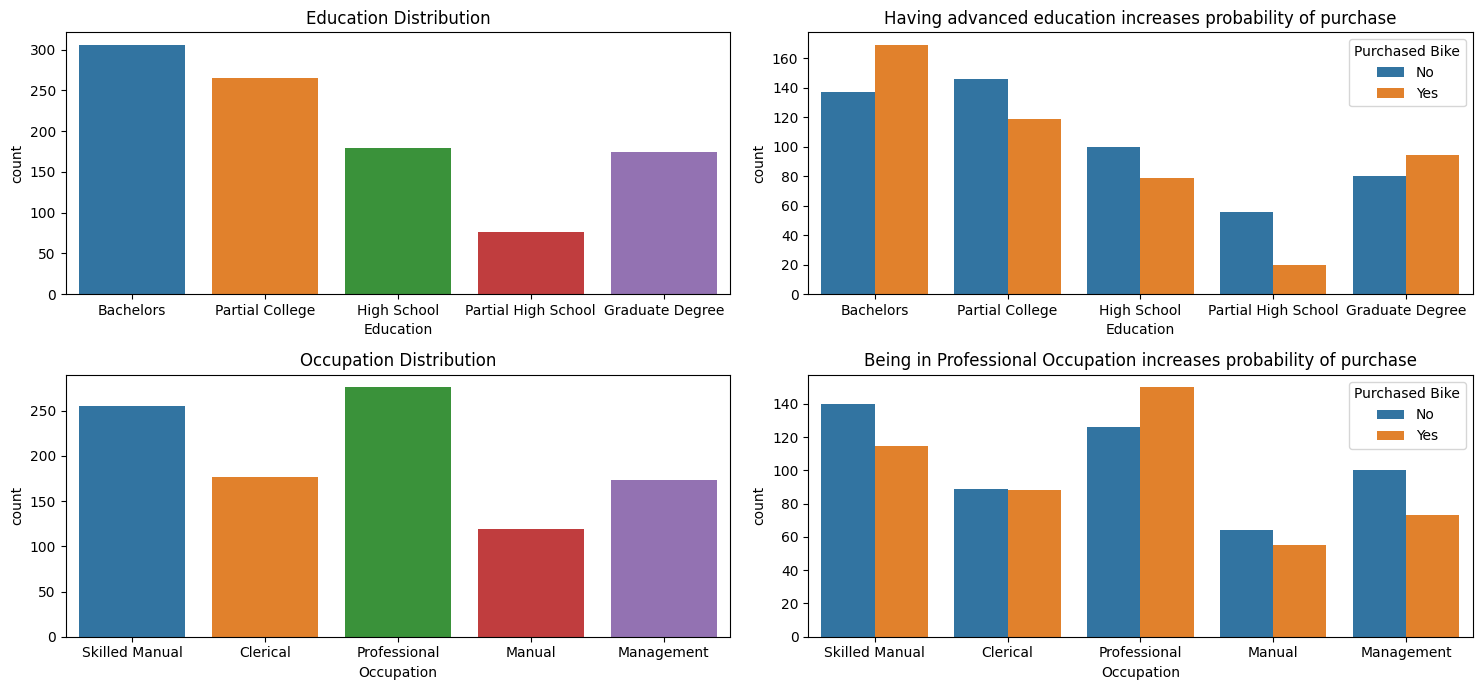

In [56]:
fig, axs = plt.subplots(2,2,figsize=(15,7))

sns.countplot(data=bike_sales_df,x='Education',ax=axs[0,0])
axs[0,0].set_title('Education Distribution')
sns.countplot(data=bike_sales_df,x='Education',hue='Purchased Bike',ax=axs[0,1])
axs[0,1].set_title('Having advanced education increases probability of purchase')

sns.countplot(data=bike_sales_df,x='Occupation',ax=axs[1,0])
axs[1,0].set_title('Occupation Distribution')
sns.countplot(data=bike_sales_df,x='Occupation',hue='Purchased Bike',ax=axs[1,1])
axs[1,1].set_title('Being in Professional Occupation increases probability of purchase')

plt.tight_layout()
plt.show()

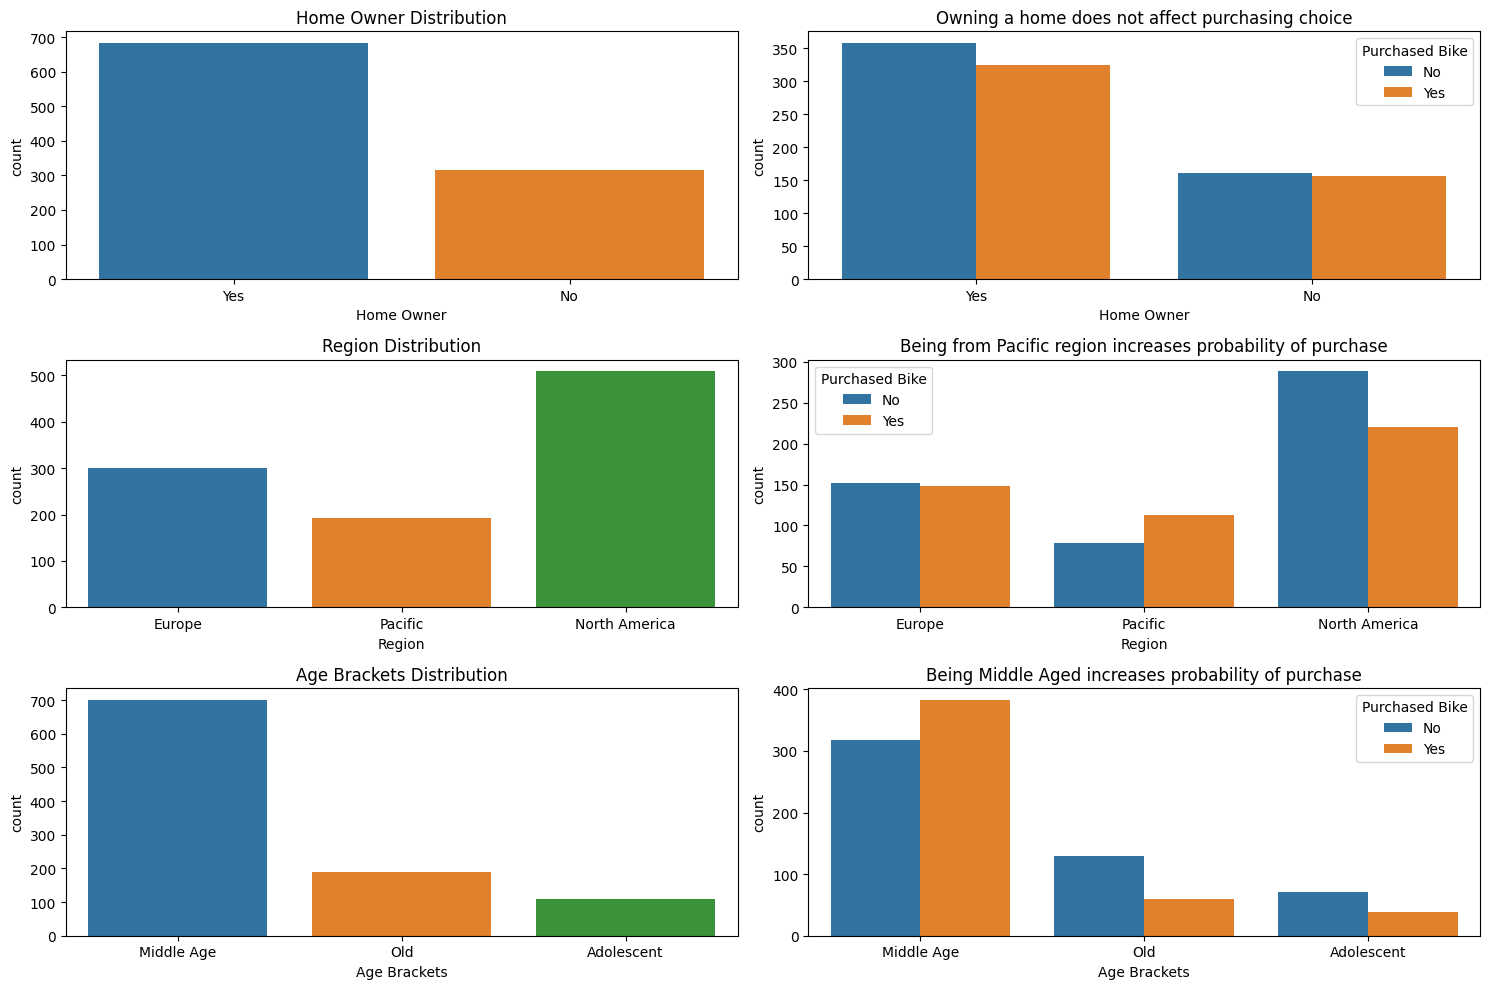

In [55]:
fig, axs= plt.subplots(3,2,figsize=(15,10))

sns.countplot(data=bike_sales_df,x='Home Owner',ax=axs[0,0])
axs[0,0].set_title('Home Owner Distribution')
sns.countplot(data=bike_sales_df,x='Home Owner',ax=axs[0,1],hue='Purchased Bike')
axs[0,1].set_title('Owning a home does not affect purchasing choice')

sns.countplot(data=bike_sales_df,x='Region',ax=axs[1,0])
axs[1,0].set_title('Region Distribution')
sns.countplot(data=bike_sales_df,x='Region',ax=axs[1,1],hue='Purchased Bike')
axs[1,1].set_title('Being from Pacific region increases probability of purchase')

sns.countplot(data=bike_sales_df,x='Age Brackets',ax=axs[2,0])
axs[2,0].set_title('Age Brackets Distribution')
sns.countplot(data=bike_sales_df,x='Age Brackets',ax=axs[2,1],hue='Purchased Bike')
axs[2,1].set_title('Being Middle Aged increases probability of purchase')

plt.tight_layout()
plt.show()

In [46]:
distance_map = {
    '0-1 Miles':1,
    '1-2 Miles':2,
    '2-5 Miles':3,
    '5-10 Miles':4,
    'More than 10 Miles':5
}
bike_sales_df['Commute Distance'].replace(to_replace=distance_map,inplace=True)
bike_sales_df.head(3)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,1,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,1,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,3,Europe,60,Old,No


In [26]:
distance_map_inv = {v:k for k,v in distance_map.items()}
distance_map_inv

{1: '0-1 Miles',
 2: '1-2 Miles',
 3: '2-5 Miles',
 4: '5-10 Miles',
 5: 'More than 10 Miles'}

In [27]:
'\n'.join(f'{k}-{v}'for k,v in distance_map_inv.items())

'1-0-1 Miles\n2-1-2 Miles\n3-2-5 Miles\n4-5-10 Miles\n5-More than 10 Miles'

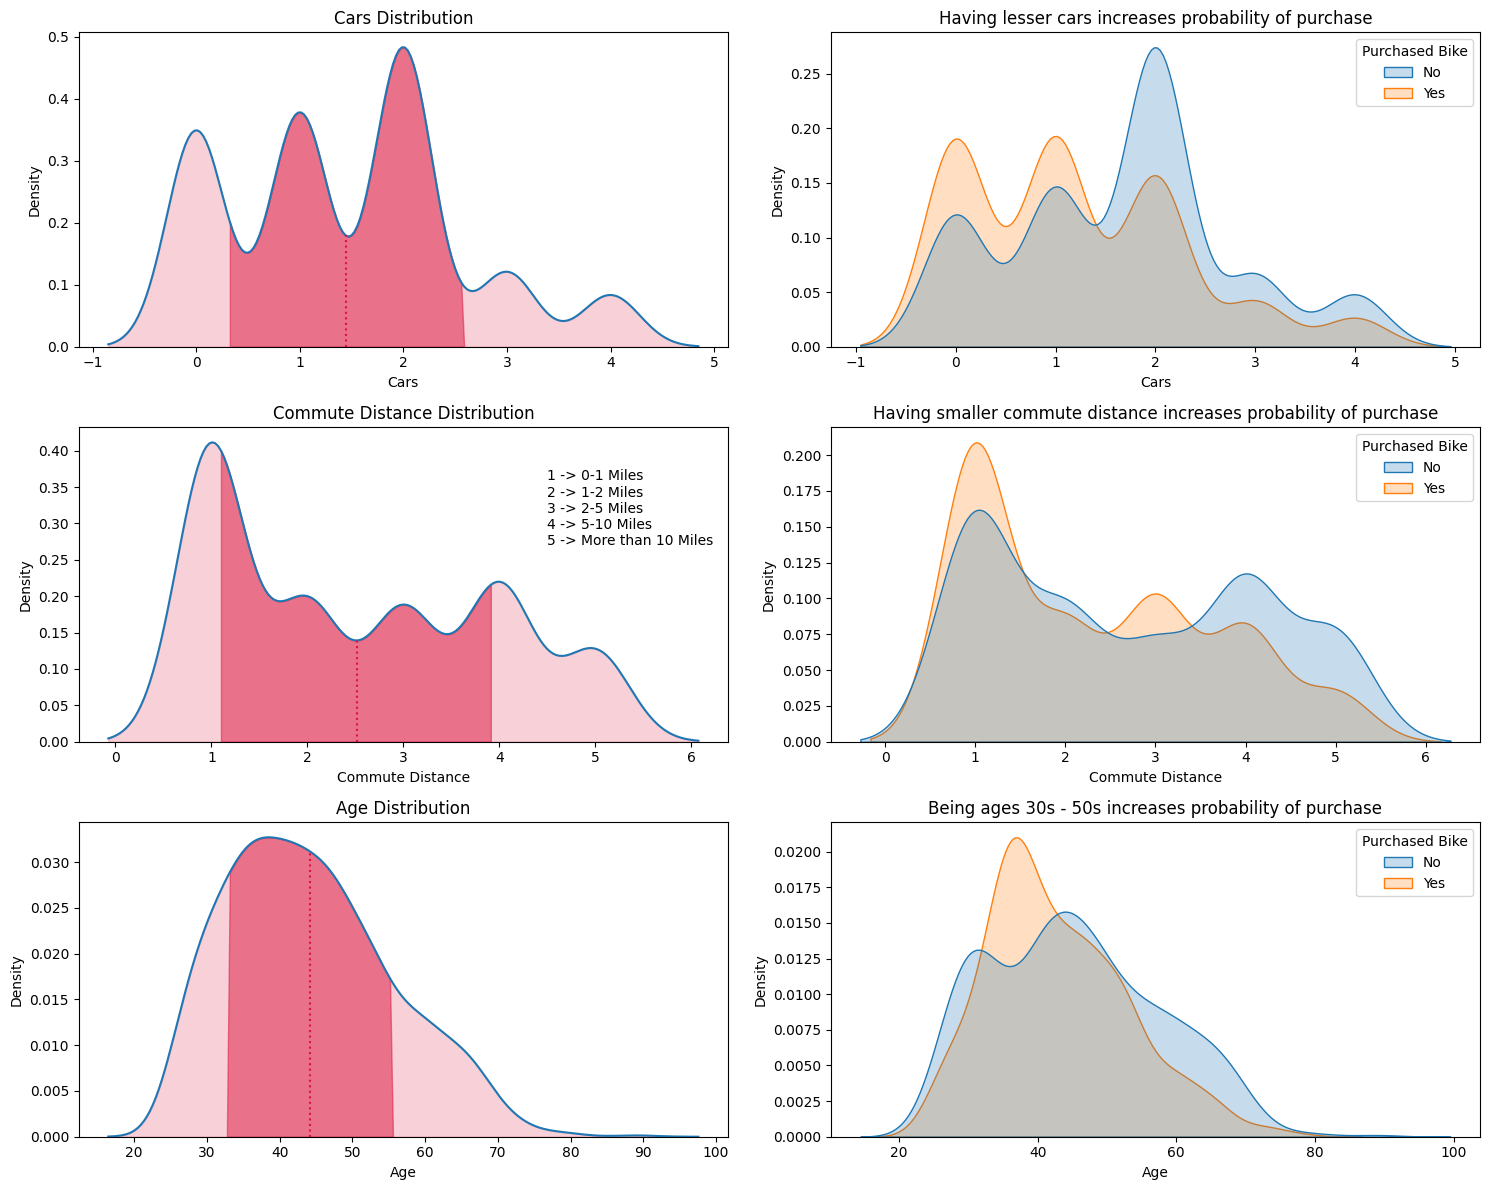

In [47]:
fig, axs = plt.subplots(3,2,figsize=(15,12))

sns.kdeplot(data=bike_sales_df,x='Cars',ax=axs[0,0])
mean = bike_sales_df.Cars.mean()
std = bike_sales_df.Cars.std()
kdeline = axs[0,0].lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean,xs,ys)
axs[0,0].vlines(mean,0,height,color='crimson',ls=':')
axs[0,0].fill_between(xs,0,ys,where=(mean-std<=xs)&(xs<=mean+std),interpolate=True,color='crimson',alpha=0.5)
axs[0,0].fill_between(xs,0,ys,color='crimson',alpha=0.2)
axs[0,0].set_title('Cars Distribution')
sns.kdeplot(data=bike_sales_df,x='Cars',ax=axs[0,1],hue='Purchased Bike',fill=True)
axs[0,1].set_title('Having lesser cars increases probability of purchase')

sns.kdeplot(data=bike_sales_df,x='Commute Distance',ax=axs[1,0])
mean = bike_sales_df['Commute Distance'].mean()
std = bike_sales_df['Commute Distance'].std()
kdeline = axs[1,0].lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean,xs,ys)
axs[1,0].vlines(mean,0,height,color='crimson',ls=':')
axs[1,0].fill_between(xs,0,ys,where=(mean-std<=xs)&(xs<=mean+std),interpolate=True,color='crimson',alpha=0.5)
axs[1,0].fill_between(xs,0,ys,color='crimson',alpha=0.2)
axs[1,0].set_title('Commute Distance Distribution')
axs[1,0].text(4.5,0.27,'\n'.join(f'{k} -> {v}'for k,v in distance_map_inv.items()))
sns.kdeplot(data=bike_sales_df,x='Commute Distance',ax=axs[1,1],hue='Purchased Bike',fill=True)
axs[1,1].set_title('Having smaller commute distance increases probability of purchase')

sns.kdeplot(data=bike_sales_df,x='Age',ax=axs[2,0])
mean = bike_sales_df.Age.mean()
std = bike_sales_df.Age.std()
kdeline = axs[2,0].lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean,xs,ys)
axs[2,0].vlines(mean,0,height,color='crimson',ls=':')
axs[2,0].fill_between(xs,0,ys,where=(mean-std<=xs)&(xs<=mean+std),interpolate=True,color='crimson',alpha=0.5)
axs[2,0].fill_between(xs,0,ys,color='crimson',alpha=0.2)
axs[2,0].set_title('Age Distribution')
sns.kdeplot(data=bike_sales_df,x='Age',ax=axs[2,1],hue='Purchased Bike',fill=True)
axs[2,1].set_title('Being ages 30s - 50s increases probability of purchase')

plt.tight_layout()
plt.show()

In [58]:
bike_sales_df.head(5)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,1,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,1,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,3,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,4,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,1,Europe,36,Middle Age,Yes


In [60]:
replace_map = {
    'Married': 1,
    'Single': 0,

    'Female': 0,
    'Male': 1,

    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4,
    'Graduate Degree': 5,

    'Manual': 1,
    'Skilled Manual': 2,
    'Clerical': 3,
    'Professional': 4,
    'Management': 5,

    'Yes': 1,
    'No': 0,

    'Europe': 1,
    'Pacific': 2,
    'North America': 3,

    'Adolescent': 1,
    'Middle Age': 2,
    'Old': 3
}

bike_sales_df.replace(to_replace=replace_map,inplace=True)
bike_sales_df.head(5)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,1,0,40000,1,4,2,1,0,1,1,42,2,0
1,24107,1,1,30000,3,3,3,1,1,1,1,43,2,0
2,14177,1,1,80000,5,3,4,0,2,3,1,60,3,0
3,24381,0,1,70000,0,4,4,1,1,4,2,41,2,1
4,25597,0,1,30000,0,4,3,0,0,1,1,36,2,1


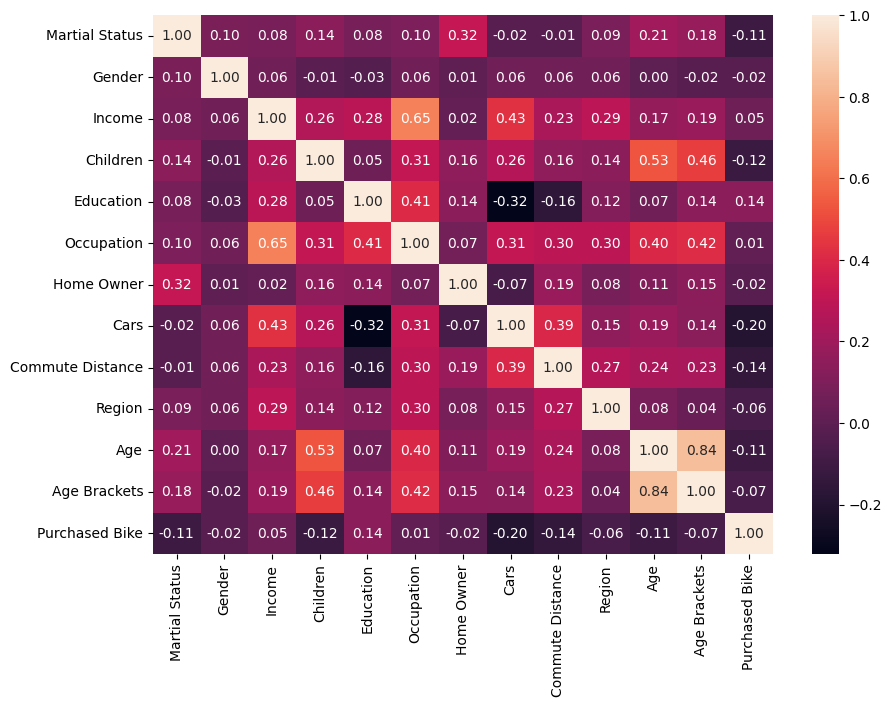

In [87]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data=bike_sales_df.drop('ID',axis=1).corr(),annot=True,fmt='.2f',ax=ax)

plt.show()

## Building Classifiers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bike_sales_df = bike_sales_df.drop(columns=['Female','Male'])
bike_sales_df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [ ]:
one_hot = pd.get_dummies(data=bike_sales_df,dtype=int,drop_first=True,prefix={'Martial Status':'MS','Gender':'G','Education':'E','Occupation':'O','Home Owner':'HO','Commute Distance':'CD','Region':'R','Age Brackets':'AB','Purchased Bike':'PB'})
one_hot.head()

,ID,Income,Children,Cars,Age,MS_Single,G_Male,E_Graduate Degree,E_High School,E_Partial College,...,HO_Yes,CD_1-2 Miles,CD_2-5 Miles,CD_5-10 Miles,CD_More than 10 Miles,R_North America,R_Pacific,AB_Middle Age,AB_Old,PB_Yes
0,12496,40000,1,0,42,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,24107,30000,3,1,43,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,14177,80000,5,2,60,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,24381,70000,0,1,41,1,1,0,0,0,...,1,0,0,1,0,0,1,1,0,1
4,25597,30000,0,0,36,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
features = one_hot.columns.to_list()
features.remove('ID')
features.remove('PB_Yes')
features

['Income',
 'Children',
 'Cars',
 'Age',
 'MS_Single',
 'G_Male',
 'E_Graduate Degree',
 'E_High School',
 'E_Partial College',
 'E_Partial High School',
 'O_Management',
 'O_Manual',
 'O_Professional',
 'O_Skilled Manual',
 'HO_Yes',
 'CD_1-2 Miles',
 'CD_2-5 Miles',
 'CD_5-10 Miles',
 'CD_More than 10 Miles',
 'R_North America',
 'R_Pacific',
 'AB_Middle Age',
 'AB_Old']

In [ ]:
X = one_hot[features]
y = one_hot['PB_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23) # 20% hold out test set to measure model performance on unseen data i.e. final evaluation
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


### Model Selection - Without hyperparameters tuning

In [ ]:
import time

In [ ]:
from sklearn.preprocessing import StandardScaler # standardscaler to normalize feature values, reduce model bias on certain features
from sklearn.feature_selection import SequentialFeatureSelector, SelectPercentile, chi2, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate # k-fold cv resampling to:
# 1) use all of the data and not waste data by splitting into another validation set - a validation set can have important relationship that your model can miss
# 2) measure model performance on unseen data based on variance of each fold - bias/variance tradeoff - a complex model will show a higher variance in cv scores
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
list_clfs = [LogisticRegression(max_iter=1000),LinearSVC(dual='auto'),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [ ]:
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        pipe = make_pipeline(StandardScaler(),model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Overall Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.65 +/- 0.05
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.15s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.65 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.09s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.65 +/- 0.05
test_roc_auc: 0.70 +/- 0.06
Execution time: 0.17s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.66 +/- 0.05
test_roc_auc: 0.66 +/- 0.05
Execution time: 0.11s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.70 +/- 0.05
test_roc_auc: 0.79 +/- 0.05
Execution time: 1.88s
-------------------------------------
Overall Execution time: 2.40s


In [ ]:
# sequential feature selection for each pipeline - pipeline fit_transform for each crossvalidation set, therefore has a ~10x time consumption
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        sfs = SequentialFeatureSelector(model,scoring='accuracy')
        pipe = make_pipeline(StandardScaler(),sfs,model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.66 +/- 0.05
test_roc_auc: 0.70 +/- 0.05
Execution time: 25.11s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.04
test_roc_auc: 0.71 +/- 0.04
Execution time: 16.23s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.71 +/- 0.06
Execution time: 47.72s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.64 +/- 0.03
test_roc_auc: 0.67 +/- 0.04
Execution time: 18.68s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.67 +/- 0.06
test_roc_auc: 0.74 +/- 0.07
Execution time: 1194.17s
-------------------------------------
Execution time: 1301.91s


In [ ]:
# added sequential feature selection for each model
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        X_train_stdsclr = StandardScaler().fit_transform(X=X_train,y=y_train)
        sfs = SequentialFeatureSelector(model,scoring='accuracy')
        X_train_sfs = sfs.fit_transform(X=X_train_stdsclr,y=y_train)
        scores = cross_validate(estimator=model,X=X_train_sfs,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.67 +/- 0.06
test_roc_auc: 0.70 +/- 0.06
Execution time: 2.64s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 1.69s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.70 +/- 0.04
test_roc_auc: 0.73 +/- 0.04
Execution time: 5.28s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.67 +/- 0.05
test_roc_auc: 0.69 +/- 0.06
Execution time: 2.09s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.71 +/- 0.03
test_roc_auc: 0.80 +/- 0.03
Execution time: 128.83s
-------------------------------------
Execution time: 140.53s


In [ ]:
# select percentile features for each pipeline
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        feature_selector = SelectPercentile(score_func=f_classif,percentile=90)
        pipe = make_pipeline(StandardScaler(),feature_selector,model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.65 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.18s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.10s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.06
Execution time: 0.19s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.67 +/- 0.04
test_roc_auc: 0.68 +/- 0.04
Execution time: 0.12s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.71 +/- 0.06
test_roc_auc: 0.78 +/- 0.05
Execution time: 1.89s
-------------------------------------
Execution time: 2.47s


### Model Selection - With hyperparameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
list_clfs = [LogisticRegression(max_iter=1000,solver='liblinear'),LinearSVC(dual='auto'),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
list_clfs

[LogisticRegression(max_iter=1000, solver='liblinear'),
 LinearSVC(dual='auto'),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [ ]:
param_grid = [
    {'penalty':['l1','l2'],
     'C':[1,5,10]},
    {'penalty':['l1','l2'],
     'C':[1,5,10]},
    {'n_neighbors':[3,5,7]},
    {'criterion':['gini','entropy']},
    {'criterion':['gini','entropy']}
]

In [ ]:
list_clf_param_grid = zip(list_clfs,param_grid)
def clf_scores_gridsearch_CV(x):
    best_clf = []
    overall_start_time = time.time()
    for ele in x:
        start_time = time.time()
        print('Training: ',ele)
        X_train_stdsclr = StandardScaler().fit_transform(X=X_train,y=y_train)
        sfs = SequentialFeatureSelector(ele[0],scoring='accuracy')
        X_train_sfs = sfs.fit_transform(X=X_train_stdsclr,y=y_train)
        gs = GridSearchCV(estimator=ele[0],param_grid=ele[1],scoring='accuracy')
        gs.fit(X_train_sfs,y_train)
        print('Best model: ',gs.best_estimator_)
        print('Best params: ',gs.best_params_)
        print('Best score: ',gs.best_score_)
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        best_clf.append((ele[0],gs))
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_gridsearch_CV(list_clf_param_grid)

Training:  (LogisticRegression(max_iter=1000, solver='liblinear'), {'penalty': ['l1', 'l2'], 'C': [1, 5, 10]})
Best model:  LogisticRegression(C=5, max_iter=1000, solver='liblinear')
Best params:  {'C': 5, 'penalty': 'l2'}
Best score:  0.6824999999999999
Execution time: 3.58s
-------------------------------------
Training:  (LinearSVC(dual='auto'), {'penalty': ['l1', 'l2'], 'C': [1, 5, 10]})
Best model:  LinearSVC(C=5, dual='auto')
Best params:  {'C': 5, 'penalty': 'l2'}
Best score:  0.6725000000000001
Execution time: 3.35s
-------------------------------------
Training:  (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
Best model:  KNeighborsClassifier(n_neighbors=3)
Best params:  {'n_neighbors': 3}
Best score:  0.68875
Execution time: 9.70s
-------------------------------------
Training:  (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy']})
Best model:  DecisionTreeClassifier(criterion='entropy')
Best params:  {'criterion': 'entropy'}
Best score:  0.6900000000000001
Exe

### Optimizing random forest classifier - best score of 0.72

In [ ]:
# checking for max depth with baseline model
clf = RandomForestClassifier()
X_train_stdsclr = StandardScaler().fit_transform(X=X_train,y=y_train)
sfs = SequentialFeatureSelector(clf,scoring='accuracy')
X_train_sfs = sfs.fit_transform(X=X_train_stdsclr,y=y_train)
clf.fit(X=X_train_sfs,y=y_train)

RandomForestClassifier()

In [ ]:
est_max_depths = [est.get_depth() for est in clf.estimators_]
print(f'Mean depth: {np.mean(est_max_depths):.2f} +/- {np.std(est_max_depths):.2f}')

Mean depth: 16.48 +/- 1.35


In [ ]:
param_grid = {'n_estimators':[100,125,150,175,200],
     'criterion':['gini','entropy','log_loss'],
     'max_depth':[9,10,11,12,13]}

In [ ]:
# test 1
start_time = time.time()
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=10,scoring='accuracy')
gs.fit(X=X_train_sfs,y=y_train)
print('Best model: ',gs.best_estimator_)
print('Best params: ',gs.best_params_)
print('Best score: ',gs.best_score_)
print('-------------------------------------')
print(f'Execution time: {(time.time()-start_time):.2f}')

Best model:  RandomForestClassifier(criterion='log_loss', max_depth=11)
Best params:  {'criterion': 'log_loss', 'max_depth': 11, 'n_estimators': 100}
Best score:  0.7262500000000001
-------------------------------------
Execution time: 169.22


In [ ]:
# test 2
start_time = time.time()
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=10,scoring='accuracy')
gs.fit(X=X_train,y=y_train)
print('Best model: ',gs.best_estimator_)
print('Best params: ',gs.best_params_)
print('Best score: ',gs.best_score_)
print('-------------------------------------')
print(f'Execution time: {(time.time()-start_time):.2f}')

Best model:  RandomForestClassifier(max_depth=11)
Best params:  {'criterion': 'gini', 'max_depth': 11, 'n_estimators': 100}
Best score:  0.7224999999999999
-------------------------------------
Execution time: 188.90


In [ ]:
# test 3
start_time = time.time()
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=10,scoring='accuracy')
gs.fit(X=X_train_sfs,y=y_train)
print('Best model: ',gs.best_estimator_)
print('Best params: ',gs.best_params_)
print('Best score: ',gs.best_score_)
print('-------------------------------------')
print(f'Execution time: {(time.time()-start_time):.2f}')

Best model:  RandomForestClassifier(max_depth=10, n_estimators=175)
Best params:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 175}
Best score:  0.7262500000000001
-------------------------------------
Execution time: 263.87


### Learnings for future work

In [ ]:
'''
Takeaways from kaggle master participant notebook
1) Handle NA and Duplicates
2) Handle outliers - z score
3) Compare correlation
4) Comment every step
5) Use visual illustration for model comparisons
6) Summarize EDA visualizations in words
'''

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


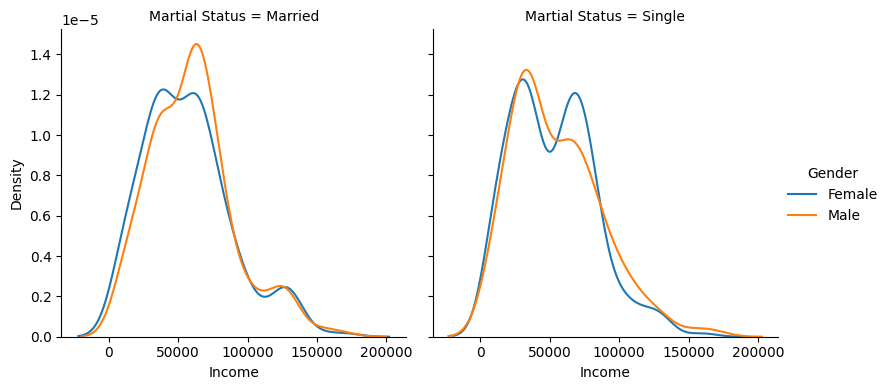

In [ ]:
# seaborn FacetGrid to display multidimensional data
g = sns.FacetGrid(bike_sales_df,col='Martial Status',hue='Gender',height=4,aspect=1)
g.map(sns.kdeplot,'Income')
g.add_legend()